## Introdution of Project
> For this project I will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.
## Summary of Project
>Using the dataset’s 16 dimensions as predictors, I applied K-Means clustering to categorize schools into two clusters: private and non-private institutions. The model achieved an accuracy of only 22%, indicating that K-Means clustering struggled with this classification task. This poor performance suggests that K-Means may not be suitable, especially given potential class imbalance and the complexity of the data.
>
>To improve performance, techniques such as oversampling the minority class, adjusting cluster initialization, or switching to more appropriate classification models like decision trees or support vector machines (SVMs) could be more effective.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
df = pd.read_csv('College_Data.csv')

In [21]:
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [23]:
df.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

>This data has 777 observations on the following 18 variables.
>
>Private: A factor with levels No and Yes indicating private or public university
>
>Apps: Number of applications received
>
>Accept: Number of applications accepted
>
>Enroll: Number of new students enrolled
>
>Top10perc: Pct. new students from top 10% of H.S. class
>
>Top25perc: Pct. new students from top 25% of H.S. class
>
>F.Undergrad: Number of fulltime undergraduates
>
>P.Undergrad: Number of parttime undergraduates
>
>Outstate: Out-of-state tuition
>
>Room.Board: Room and board costs
>
>Books: Estimated book costs
>
>Personal: Estimated personal spending
>
>PhD: Pct. of faculty with Ph.D.’s
>
>Terminal: Pct. of faculty with terminal degree
>
>S.F.Ratio: Student/faculty ratio
>
>perc.alumni: Pct. alumni who donate
>
>Expend: Instructional expenditure per student
>
>Grad.Rate: Graduation rate

##  EDA

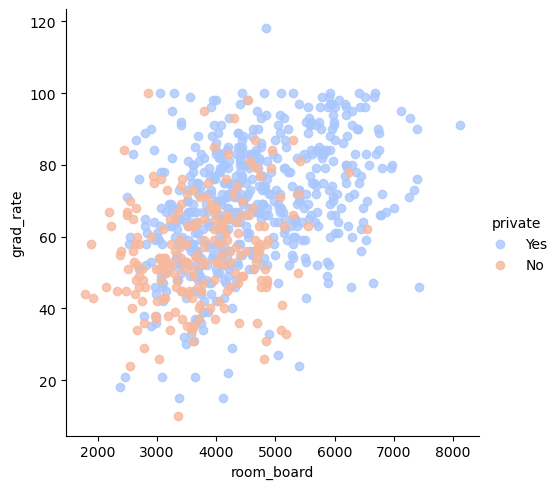

In [29]:
sns.lmplot(data = df, x = 'room_board', y = 'grad_rate', hue = 'private', fit_reg = False, palette = 'coolwarm',aspect = 1)

<b> Insight of 1st Graph</b>
> This chart does not clearly show any clear distinction between private and public schools in terms of room and board costs and graduation rate, except that private schools are more widely distributed.

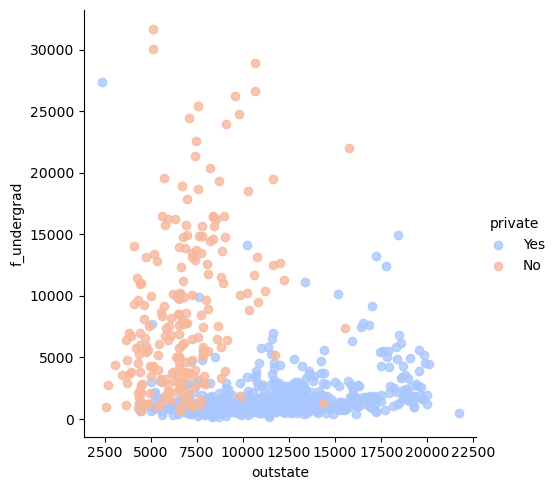

In [32]:
sns.lmplot(data = df, x = 'outstate', y = 'f_undergrad', hue = 'private', fit_reg = False, palette = 'coolwarm')

<b> Insight of 2nd Graph</b>
> The comparison between private and public schools reveals several key differences, particularly in tuition and student body size. Private schools generally have much higher tuition rates than public schools, with a clear cutoff point separating the two. Public schools, often funded by state governments, tend to offer lower tuition rates for in-state students, while out-of-state tuition is still lower than the average cost of private institutions.
>
>In terms of student body size, public schools typically have larger numbers of undergraduates compared to private schools, which are usually smaller and more expensive. This reflects the different models of education funding and access: public schools cater to a broader demographic with lower costs and more capacity, while private schools often maintain smaller communities with more individualized attention at a higher price.



Text(0.5, 0, 'outstate')

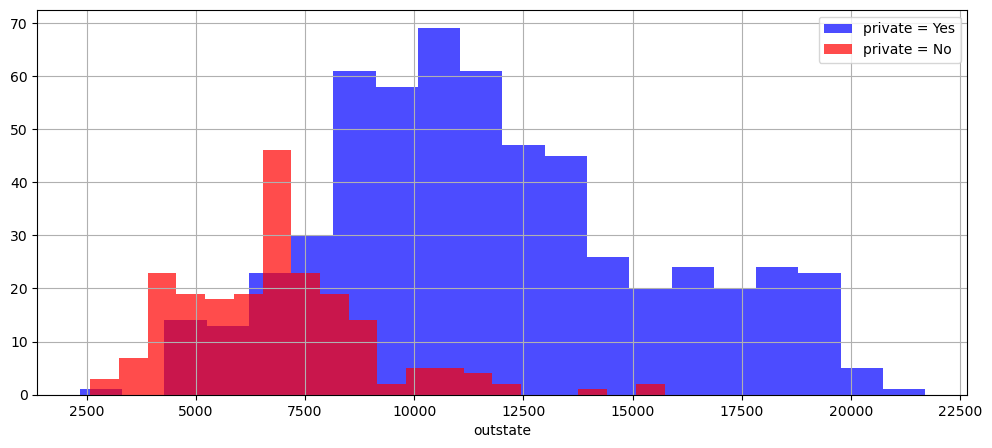

In [35]:
plt.figure(figsize = (12,5))
df[df['private'] == 'Yes']['outstate'].hist(bins = 20,color = 'blue',label = 'private = Yes',alpha = 0.7)
df[df['private'] == 'No']['outstate'].hist(bins = 20,color = 'red',label = 'private = No',alpha = 0.7)
plt.legend()
plt.xlabel('outstate')

<b> Insight of 3rd Graph</b>
> Out-of-state tuition of private school is much higher than Out-of-state tuition of public school.

Text(0.5, 0, 'grad_rate')

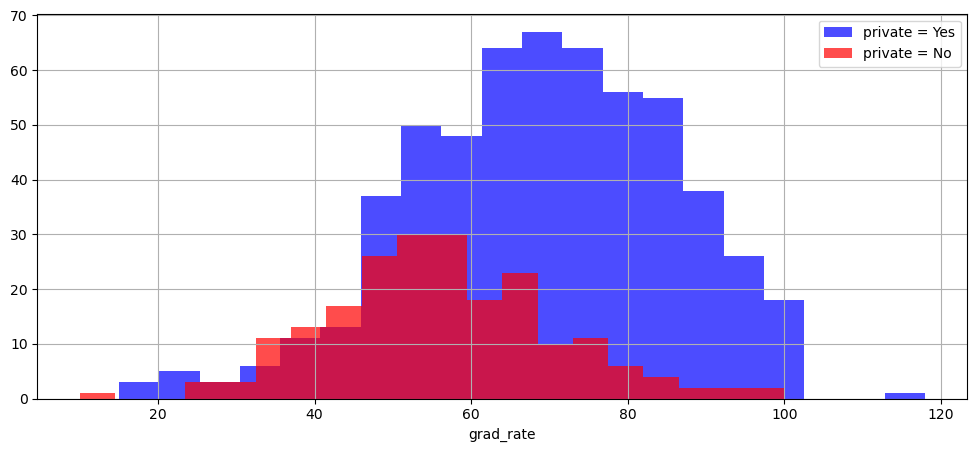

In [38]:
plt.figure(figsize = (12,5))
df[df['private'] == 'Yes']['grad_rate'].hist(bins = 20,color = 'blue',label = 'private = Yes',alpha = 0.7)
df[df['private'] == 'No']['grad_rate'].hist(bins = 20,color = 'red',label = 'private = No',alpha = 0.7)
plt.legend()
plt.xlabel('grad_rate')

<b> Insight of 4th Graph</b>
>We find there is a misleading number which the graduation rate is larger than 100%, and this number should be deleted.

In [41]:
df[df['grad_rate'] > 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [43]:
df['grad_rate'][95] = 100

/var/folders/xc/_trsj25x7t919_5thmn2zzpm0000gn/T/ipykernel_9447/3277239017.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['grad_rate'][95] = 100
/var/folders/xc/_trsj25x7t919_5thmn2zzpm0000gn/T/ipykernel_9447/3277239017.py:1: Setting

In [45]:
df[df['grad_rate'] > 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate


Text(0.5, 0, 'grad_rate')

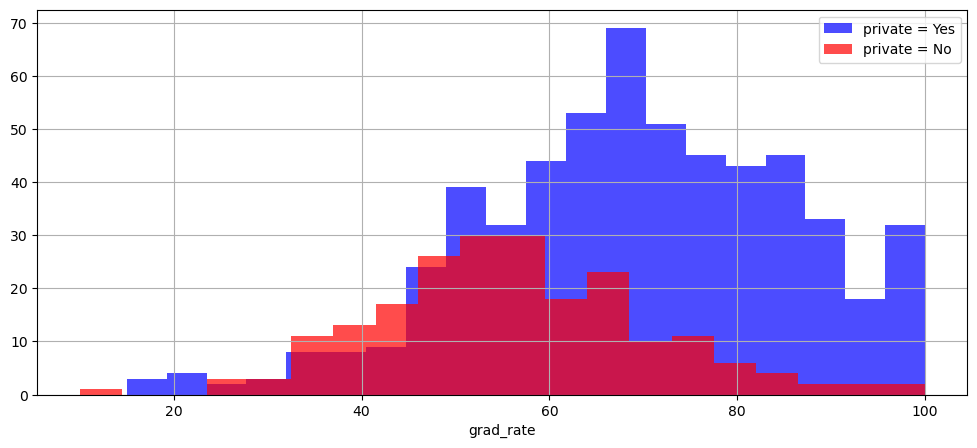

In [47]:
plt.figure(figsize = (12,5))
df[df['private'] == 'Yes']['grad_rate'].hist(bins = 20,color = 'blue',label = 'private = Yes',alpha = 0.7)
df[df['private'] == 'No']['grad_rate'].hist(bins = 20,color = 'red',label = 'private = No',alpha = 0.7)
plt.legend()
plt.xlabel('grad_rate')

<b> Insight of 4th Graph</b>
>The graduation rate of private schools tends to be significantly higher than that of public schools. One possible reason is that students who pay higher tuition may receive more academic support and resources, making it easier for them to graduate. Additionally, the smaller class sizes and individualized attention in private institutions could contribute to this higher success rate. While it's not solely about paying more for an easier path to graduation, the higher investment in tuition often correlates with enhanced learning environments that help students stay on track to complete their degrees.

## K Means Cluster

In [51]:
from sklearn.cluster import KMeans

In [52]:
km = KMeans(n_clusters = 2)
km.fit(df.drop('private', axis = 1))

KMeans(n_clusters=2)

In [54]:
km.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

## Evaluation

In [58]:
def converter(private):
    if private == 'Yes':
        return 1
    else:
        return 0
df['Cluster'] = df['private'].apply(converter)
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,Cluster
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(classification_report(df['Cluster'], km.labels_))
print(confusion_matrix(df['Cluster'], km.labels_))

              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777

[[138  74]
 [531  34]]


<b>Insight</b>
>The evaluation metrics provided for the K-Means clustering model indicate poor performance in terms of classification accuracy, which suggests that K-Means clustering may not be the best approach for this task, especially when the underlying data has significant class imbalance or complex patterns.